### 단순선형회귀

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 아버지와 아들의 키 - Galton

In [6]:
df = pd.read_csv('data/Galton.txt',sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 아버지와 아들의 키만 발췌

In [7]:
df2 = df[df.Gender=='M'].copy()
df2.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4
8,3,75.0,64.0,M,71.0,2
10,4,75.0,64.0,M,70.5,5


In [9]:
df2 = df2[['Father','Height']]
df2.columns = ['Father','Son']
df2.head()


,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5


In [11]:
df2 = df2*2.54
df2.head()

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070


- 산점도 구하기

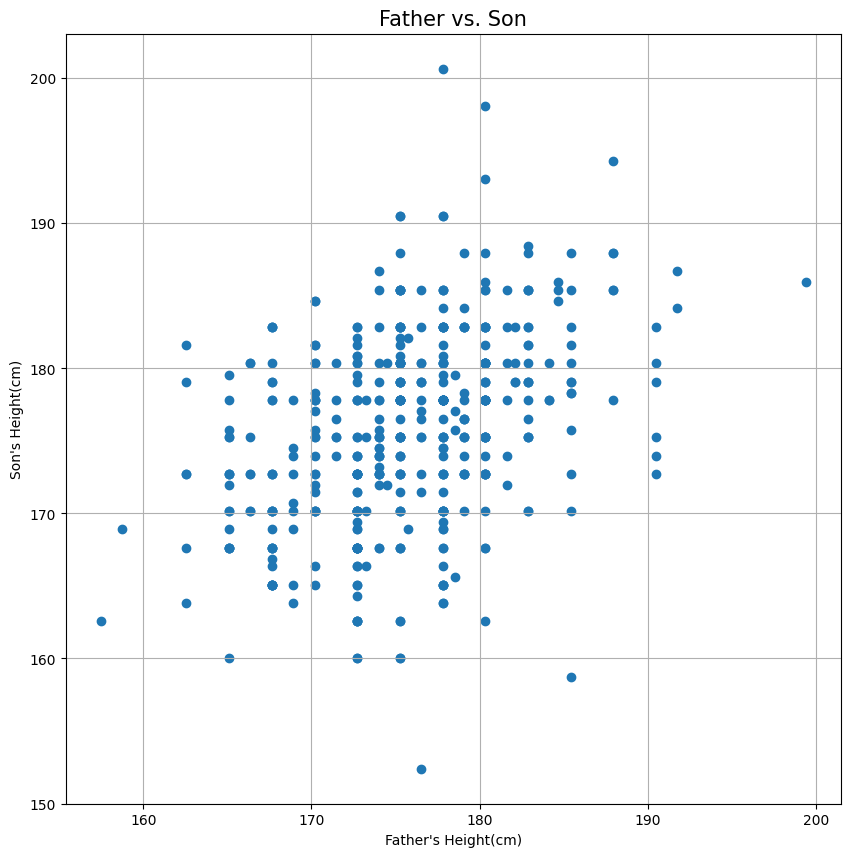

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(df2.Father,df2.Son)
plt.xlabel("Father's Height(cm)")
plt.ylabel("Son's Height(cm)")
plt.title("Father vs. Son",fontsize=15)
plt.grid();

- 회귀선 구하고 그리기   
    - np.linalg.lstsq()     # 최소 자승법(Least square)
    - np.polyfit()

In [19]:
weight, bias = np.polyfit(df2.Father,df2.Son, 1)          # X, Y, 차수(degree)
weight, bias

(0.4477479176030284, 97.17763700739303)

In [20]:
# 2차식의 회귀식
np.polyfit(df2.Father,df2.Son,2)

array([6.10561389e-04, 2.32817725e-01, 1.16071746e+02])

In [21]:
df2.Father.max(), df2.Father.min()

(199.39000000000001, 157.48)

In [22]:
# 회귀선(직선)
xs = np.array([157,200])
ys = xs * weight + bias
ys

array([167.47406007, 186.72722053])

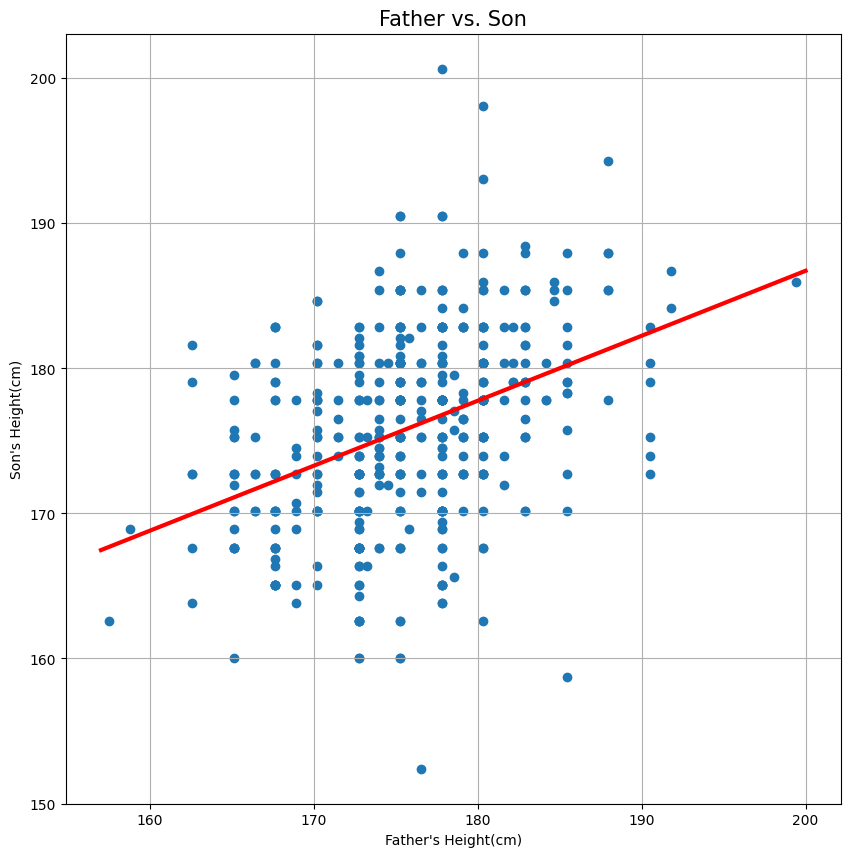

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(df2.Father,df2.Son)
plt.plot(xs,ys,lw=3,c='red')
plt.xlabel("Father's Height(cm)")
plt.ylabel("Son's Height(cm)")
plt.title("Father vs. Son",fontsize=15)
plt.grid();

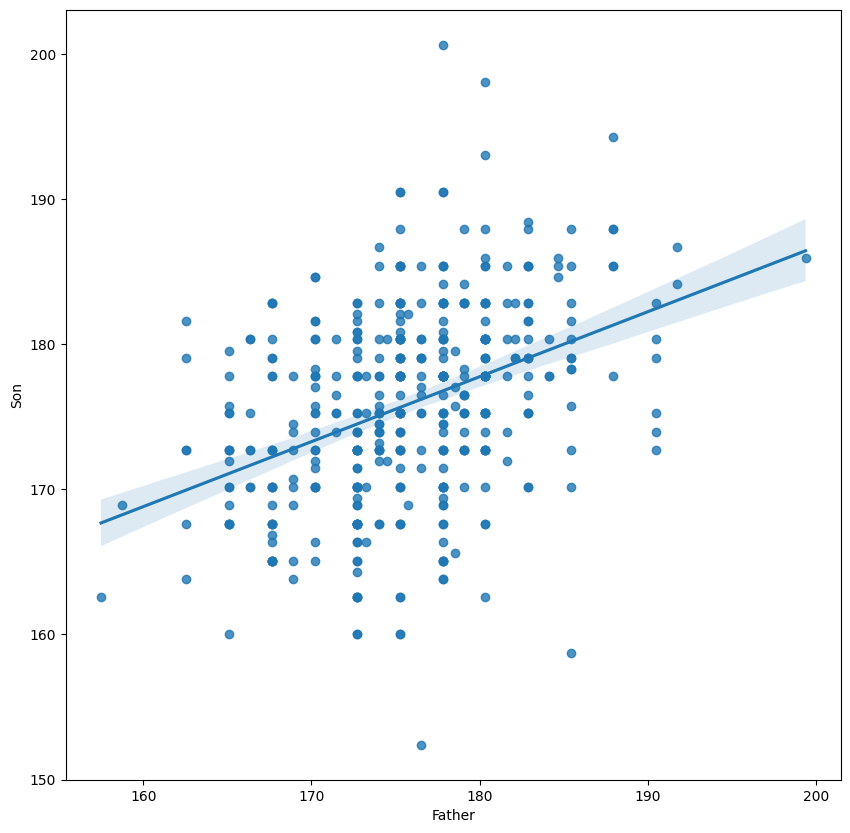

In [25]:
plt.figure(figsize=(10,10))
sns.regplot(x='Father',y='Son',data=df2);

- scikit-learn으로 회귀식 구하기

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [28]:
# X 데이터의 차원을 2로 만들어주어야 함
X = df2.Father.values.reshape(-1,1)
y = df2.Son.values
X.shape, y.shape

((465, 1), (465,))

In [29]:
# 학습
lr.fit(X,y)

LinearRegression()

In [30]:
# weight, bias
lr.coef_, lr.intercept_
# np.polyfit()으로 구한 값

(array([0.44774792]), 97.17763700739333)

- 평가 - R Squared

In [31]:
lr.score(X,y)           # 1 - Sum Of Square Error(residue) / Sum of Square Total

0.15312927478307026

In [33]:
from sklearn.metrics import r2_score
pred = lr.predict(X)
r2_score(y,pred)            # 상대적 비교값

0.15312927478307026

In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,pred)

37.756127990309636